In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

In [87]:
data=pd.read_csv("E:\DataSets\kc_house_data.csv")

In [88]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [89]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [90]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\majds\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


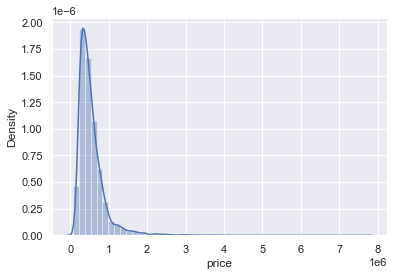

In [91]:
sns.distplot(data['price']);

In [92]:
#missing data
total=data.isnull().sum().sort_values(ascending=False)
missing_data=pd.concat([total],axis=1,keys=["total null values"])
missing_data


,total null values
id,0
grade,0
sqft_living15,0
long,0
lat,0
zipcode,0
yr_renovated,0
yr_built,0
sqft_basement,0
sqft_above,0


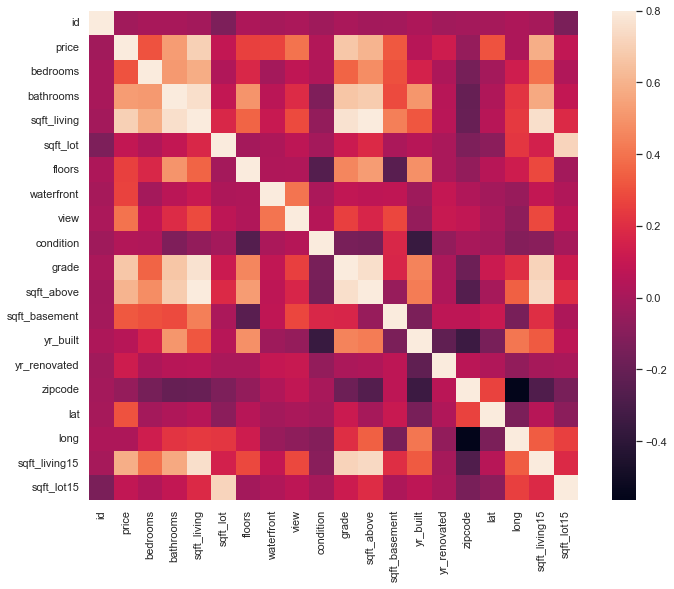

In [93]:
#correlation matrix
corrmat=data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

C:\Users\majds\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


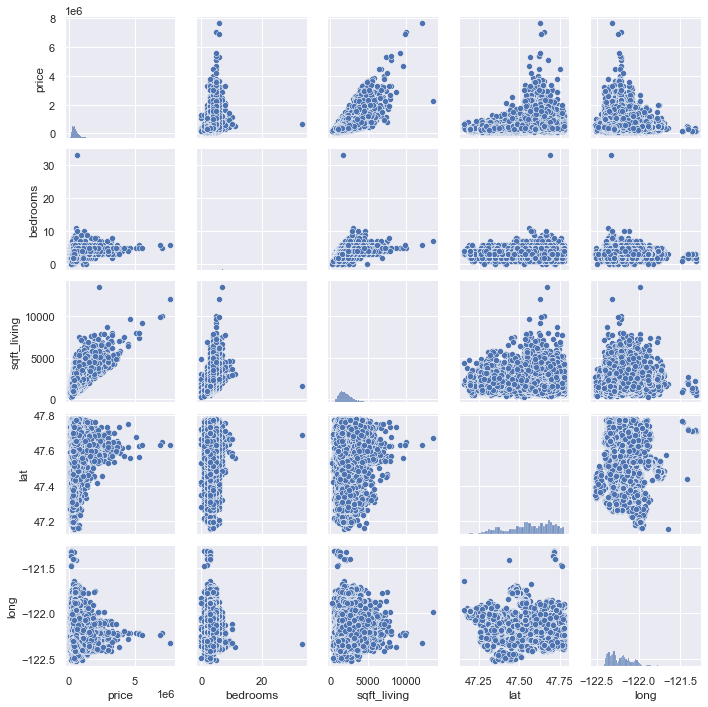

In [94]:
#scatterplot
sns.set()
cols=["price","bedrooms","sqft_living","lat","long"]
sns.pairplot(data[cols],size=2)
plt.show()

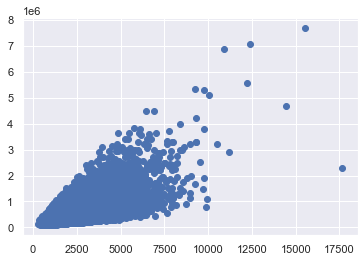

In [95]:
plt.scatter((data.sqft_living+data.sqft_basement),data.price)

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

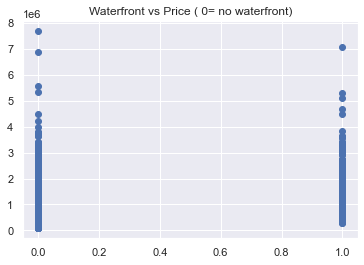

In [96]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

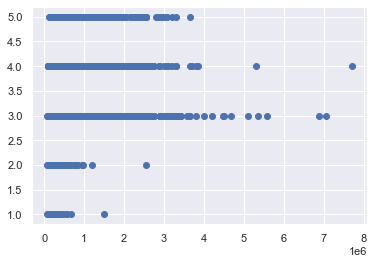

In [97]:
plt.scatter(data.price,data.condition)

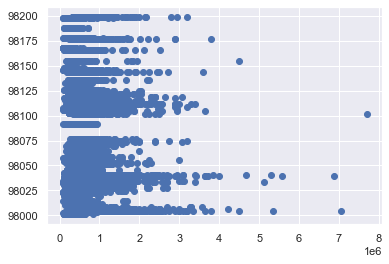

In [98]:
plt.scatter(data.price,data.zipcode)

In [99]:
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train_data=data.drop(["id","price"],axis=1)
labels=data["price"]

In [100]:
train_data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [101]:
x_train , x_test , y_train , y_test=train_test_split(train_data,labels,test_size = 0.10,random_state =44)

In [104]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.7285855380115156

In [120]:
clf = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.9056841857354115

In [105]:
scale=StandardScaler()
scaled_train_data=scale.fit_transform(train_data)

In [106]:
scaled_train_data

array([[ 0.        , -0.39873715, -1.44746357, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [ 0.        , -0.39873715,  0.1756067 , ..., -0.74634143,
        -0.43268619, -0.18786773],
       [ 0.        , -1.47395936, -1.44746357, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [ 0.        , -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [ 0.        , -0.39873715,  0.50022075, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [ 0.        , -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [107]:
x_train , x_test , y_train , y_test=train_test_split(scaled_train_data,labels,test_size = 0.10,random_state =44)

In [113]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

0.7455137971300403

In [119]:
clf = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.9060726122103615